### Project Members

- _Abdulrahman Alshahrani_
- _Savindu Wimalasooriya_
- _Mason Wilderom_
- _Kenny Nguyen_

# Introduction

In this Jupyter Notebook, we will be working on a brain tumor MRI dataset available from Kaggle. The objective is to classify MRI images into categories indicating the presence or absence of a brain tumor. This problem is significant in the medical field as early and accurate detection of brain tumors can significantly influence treatment outcomes.

## Problem Statement

The machine learning problem we are addressing is the classification of MRI images into tumor and no-tumor categories. Accurate classification can aid in early diagnosis and treatment planning.

## Importance of the Problem

Timely and accurate tumor detection is crucial for effective treatment planning, potentially reducing mortality rates and improving patient outcomes.

## Dataset Description

We will use a dataset from Kaggle which contains MRI images labeled as 'tumor' or 'no-tumor'. Each image is provided as a separate file, and labels are provided in an accompanying metadata file.

# Data Preparation

Data preparation is a critical step in any machine learning project. In this section, we will perform data cleaning, data exploration, and feature engineering.

## Data Loading

First, we will load the dataset and take an initial look at its structure.

#### Imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [4]:
def load_images_from_folder(folder_path):
    image_data = []
    labels = []
    for label_dir in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, label_dir)):
            for file in os.listdir(os.path.join(folder_path, label_dir)):
                file_path = os.path.join(folder_path, label_dir, file)
                image = Image.open(file_path).convert('L')
                image = image.resize((224, 224))
                image_array = np.array(image).flatten()
                image_data.append(image_array)
                labels.append(label_dir)
    
    # Normalize the image data
    mean_gray = np.mean(image_data) / 255.0
    std_gray = np.std(image_data) / 255.0
    image_data = [(img_data - mean_gray) / std_gray for img_data in image_data]

    return np.array(image_data), np.array(labels)
    # for i in range(len(image_data)):
    #     d = {}
    #     for j in range(224*224):
    #         d[f'pixel_{j}'] = image_data[i][j]
    #     d['label'] = labels[i]
    #     data.append(d)

    # return pd.DataFrame(data)

training_set_path = os.path.join('data', 'Training')
test_set_path = os.path.join('data', 'Testing')

training_dataset = load_images_from_folder(training_set_path)
test_dataset = load_images_from_folder(test_set_path)    

## Data Exploration

In [7]:
# training_dataset.to_csv('training_dataset.csv', index=False)
training_dataset

(array([[-0.91407527, -0.91407527, -0.91407527, ..., -0.91407527,
         -0.91407527, -0.91407527],
        [-0.91407527, -0.91407527, -0.91407527, ..., -0.91407527,
         -0.91407527, -0.91407527],
        [-0.91407527, -0.91407527, -0.91407527, ..., -0.91407527,
         -0.91407527, -0.91407527],
        ...,
        [-0.91407527, -0.91407527, -0.91407527, ..., -0.91407527,
         -0.91407527, -0.91407527],
        [-0.91407527, -0.91407527, -0.91407527, ..., -0.91407527,
         -0.91407527, -0.91407527],
        [-0.91407527, -0.91407527, -0.91407527, ..., -0.91407527,
         -0.91407527, -0.91407527]]),
 array(['meningioma', 'meningioma', 'meningioma', ..., 'pituitary',
        'pituitary', 'pituitary'], dtype='<U10'))

## Data Cleaning

Describe and perform the cleaning steps necessary for your dataset. This could include removing duplicates, handling missing values, or correcting data errors.

In [5]:
print("Training dataset shape is ", training_dataset[0].shape)
print("Test dataset shape is ", test_dataset[0].shape)
print("number of NaN values in the training dataset is ", np.isnan(training_dataset[0]).sum())
print("number of NaN values in the     test dataset is ", np.isnan(test_dataset[0]).sum())

Training dataset shape is  (5712, 50176)
Test dataset shape is  (1311, 50176)
number of NaN values in the training dataset is  0
number of NaN values in the     test dataset is  0


## Data Exploration

Explore the data to understand its characteristics and structure. This can include visualizing image samples, their labels, and other relevant statistics.

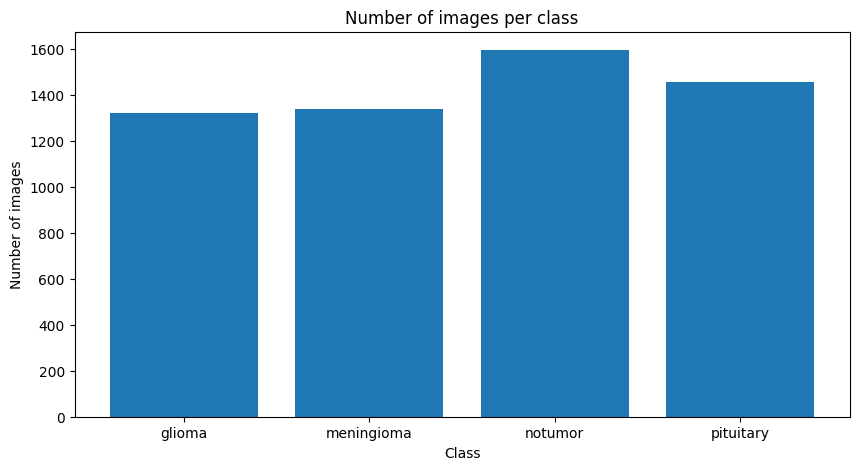

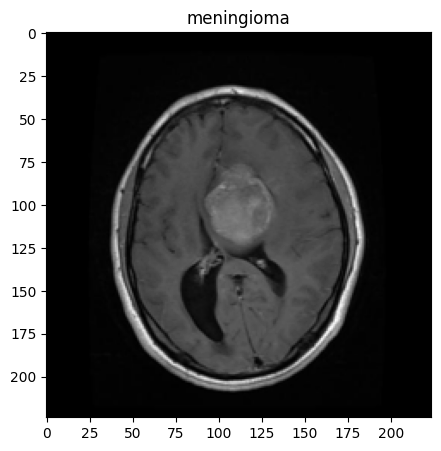

In [6]:
# display a bar graph of each class and the number of images in each class
labels, counts = np.unique(training_dataset[1], return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images per class')
plt.show()

# display a sample image from the dataset
plt.figure(figsize=(5, 5))
plt.imshow(training_dataset[0][0].reshape(224, 224), cmap='gray')
plt.title(training_dataset[1][0])
plt.show()

## Feature Engineering

Discuss and implement feature engineering. In the context of image data, this might involve normalizing the images, using techniques like PCA for dimensionality reduction, or generating additional features from the existing data.

In [ ]:
"""
In the previous steps, we did resize all of the images, read them as grayscales, and normalized them. We also made it so that each column correspond to the ith pixel of the image.
"""

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(training_dataset[0])
training_dataset_pca = pca.transform(training_dataset[0])
test_dataset_pca = pca.transform(test_dataset[0])

X = training_dataset_pca
y = training_dataset[1]

print("Training dataset shape after PCA is ", training_dataset_pca.shape)
print("Test dataset shape after PCA is ", test_dataset_pca.shape)

'\nIn the previous steps, we did resize all of the images, read them as grayscales, and normalized them. We also made it so that each column correspond to the ith pixel of the image.\n'

# Modeling

In this section, we will apply various machine learning algorithms to our data and evaluate their performance.

## Model Selection

We will try a variety of algorithms like Logistic Regression, Random Forest, and SVM. We'll use cross-validation to evaluate each model's performance.



### 1. Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [30, None],
    'min_samples_split': [10, 20]
}

# Initialize the classifier
dt = DecisionTreeClassifier()

# Setup GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_dt.fit(X, y)

# Best parameters and CV score
print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))

### 2. Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the regressor
lr = LinearRegression()

# Cross-validate
scores = cross_val_score(lr, X, y, cv=3, scoring='neg_mean_squared_error')

# Best CV score
print("Best cross-validation MSE: {:.2f}".format(np.mean(scores)))

### 3. Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Setting up the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [30, None]
}

# Initialize the classifier
rf = RandomForestClassifier()

# Setup GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X, y)

# Best parameters and CV score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

### 4. Multi-Layer Perceptrons (MLPs)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Setting up the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize the MLP classifier
mlp = MLPClassifier(max_iter=1000)

# Setup GridSearchCV
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search_mlp.fit(X, y)

# Best parameters and CV score
print("Best parameters:", grid_search_mlp.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_mlp.best_score_))

#### 5. Convolutional Neural Networks (CNNs)

Now we a slightly more modern neural network and compare its performance with the previous models. This uses the tensorflow library

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch, HyperParameters

# Define a function to build the CNN model
def build_model(hp):
    model = Sequential([
        # Reshape the flattened input to 224x224x1
        Reshape((224, 224, 1), input_shape=(50176,)),
        Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu'
        ),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'
        ),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(
            units=hp.Int('dense_1_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Adjust the number of units based on the number of classes
    ])
    
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='output',
    project_name='CNN_Tuning'
)

# Perform hyperparameter tuning
tuner.search(X, y, epochs=10, validation_split=0.1)  # Use training data split for validation

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The best model uses {best_hps.get('conv_1_filter')} filters in the first layer,
a kernel size of {best_hps.get('conv_1_kernel')} and {best_hps.get('conv_2_filter')} filters in the second layer,
a kernel size of {best_hps.get('conv_2_kernel')}, and {best_hps.get('dense_1_units')} dense units.
It uses a learning rate of {best_hps.get('learning_rate')}.
""")

# Retrieve the best model.
best_cnn_model = tuner.get_best_models(num_models=1)[0]

## Model Evaluation

Evaluate the performance of each model using appropriate metrics. This can include accuracy, precision, recall, F1-score, and confusion matrices.

In [ ]:
# find the accuracy, precision, recall, and F1 score of all the previous models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree
dt = DecisionTreeClassifier(**grid_search_dt.best_params_)
dt.fit(X, y)
dt_preds = dt.predict(test_dataset[0])
dt_accuracy = accuracy_score(test_dataset[1], dt_preds)
dt_precision = precision_score(test_dataset[1], dt_preds, average='weighted')
dt_recall = recall_score(test_dataset[1], dt_preds, average='weighted')
dt_f1 = f1_score(test_dataset[1], dt_preds, average='weighted')

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
lr_preds = lr.predict(test_dataset[0])
lr_preds = np.round(lr_preds)
lr_preds = np.clip(lr_preds, 0, 9)
lr_accuracy = accuracy_score(test_dataset[1], lr_preds)
lr_precision = precision_score(test_dataset[1], lr_preds, average='weighted')
lr_recall = recall_score(test_dataset[1], lr_preds, average='weighted')
lr_f1 = f1_score(test_dataset[1], lr_preds, average='weighted')

# Random Forest
rf = RandomForestClassifier(**grid_search_rf.best_params_)
rf.fit(X, y)
rf_preds = rf.predict(test_dataset[0])
rf_accuracy = accuracy_score(test_dataset[1], rf_preds)
rf_precision = precision_score(test_dataset[1], rf_preds, average='weighted')
rf_recall = recall_score(test_dataset[1], rf_preds, average='weighted')
rf_f1 = f1_score(test_dataset[1], rf_preds, average='weighted')

# MLP
mlp = MLPClassifier(**grid_search_mlp.best_params_)
mlp.fit(X, y)
mlp_preds = mlp.predict(test_dataset[0])
mlp_accuracy = accuracy_score(test_dataset[1], mlp_preds)
mlp_precision = precision_score(test_dataset[1], mlp_preds, average='weighted')
mlp_recall = recall_score(test_dataset[1], mlp_preds, average='weighted')
mlp_f1 = f1_score(test_dataset[1], mlp_preds, average='weighted')

# CNN
cnn_preds = best_cnn_model.predict(test_dataset[0])
cnn_preds = np.argmax(cnn_preds, axis=1)
cnn_accuracy = accuracy_score(test_dataset[1], cnn_preds)
cnn_precision = precision_score(test_dataset[1], cnn_preds, average='weighted')
cnn_recall = recall_score(test_dataset[1], cnn_preds, average='weighted')
cnn_f1 = f1_score(test_dataset[1], cnn_preds, average='weighted')

# Create a DataFrame to display the results
results = {
    'Model': ['Decision Tree', 'Linear Regression', 'Random Forest', 'MLP', 'CNN'],
    'Accuracy': [dt_accuracy, lr_accuracy, rf_accuracy, mlp_accuracy, cnn_accuracy],
    'Precision': [dt_precision, lr_precision, rf_precision, mlp_precision, cnn_precision],
    'Recall': [dt_recall, lr_recall, rf_recall, mlp_recall, cnn_recall],
    'F1 Score': [dt_f1, lr_f1, rf_f1, mlp_f1, cnn_f1]
}

### Display the Model Evaluations

In [ ]:
# Display the results in graphs
plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of each model')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Precision'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of each model')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['Recall'])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of each model')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(results['Model'], results['F1 Score'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score of each model')
plt.show()

# Save the results in a DataFrame
results_df = pd.DataFrame(results)
results_df

# Results and Discussion

Discuss the results obtained. Compare the performance across the models, and provide insights on which models performed better and why. Discuss any challenges encountered and how they were addressed.

## Conclusion

Summarize the findings and the approach. Reflect on how the model could be used in practice and any potential improvements or next steps that could be taken to enhance the model.

